# Data import and Analysis 

This notebook explores the characterists of CBZ Female Exposure water sample. 
The notebook also splits data into train and test set (7:2 ratio) for the 9 total samples collected.
A series of training models are explored and test classifiers are run 
The data is also normalized

The dataframe below is loaded in as a panda file 


In [1]:
import pandas as pd 

df = pd.read_csv('Matrix_.csv')
df = df.set_index('Probe')

print(df)

              CBZ Female CBZ C1  CBZ Female  CBZ C2  CBZ Female CBZ C3  \
Probe                                                                    
A_15_P100002         732.140686          751.492957        1061.578781   
A_15_P100003           5.642436           12.280938           9.643904   
A_15_P100007          24.650720           19.237571          71.626645   
A_15_P100008         288.779800          207.017687         394.963392   
A_15_P100009           8.344403           12.280938          10.741866   
...                         ...                 ...                ...   
WilsonLab_58         115.665400          153.229708          80.470819   
WilsonLab_61          50.938440          128.221837         126.252399   
WilsonLab_64          12.644100           12.671796          10.920070   
WilsonLab_70          83.487090          141.864240         252.289739   
WilsonLab_9         1142.360579         1568.685640         989.652217   

              CBZ Female CBZ L1  CBZ 

The 2 cells below shows the column titles of the 9 columns and the characteristics of the dataframe (mean, std, etc)

In [2]:
print(df.columns)

Index(['CBZ Female CBZ C1', 'CBZ Female  CBZ C2', 'CBZ Female CBZ C3',
       'CBZ Female CBZ L1', 'CBZ Female CBZ L2', 'CBZ Female CBZ L3',
       'CBZ Female H1', 'CBZ Female CBZ H2', 'CBZ Female CBZ H3'],
      dtype='object')


In [3]:
df.describe()

,CBZ Female CBZ C1,CBZ Female CBZ C2,CBZ Female CBZ C3,CBZ Female CBZ L1,CBZ Female CBZ L2,CBZ Female CBZ L3,CBZ Female H1,CBZ Female CBZ H2,CBZ Female CBZ H3
count,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000,43603.000000
mean,1161.089432,1191.436707,1213.060193,1178.186325,1170.456578,1191.374663,1194.571627,1170.344904,1189.543697
std,6790.479860,6990.052555,7086.457312,6756.484820,6900.348501,6708.569614,7008.950553,6849.983882,6841.017121
min,5.000000,12.280938,9.643904,5.000000,11.570123,5.000000,10.536166,5.000000,7.309313
25%,5.000000,12.280938,9.643904,5.089004,11.570123,6.309611,10.536166,5.000000,7.309313
50%,20.519030,29.178600,23.384693,28.169750,30.411837,36.546310,27.043515,20.819880,23.653580
75%,177.642450,203.470412,260.545403,214.937800,179.916743,312.647150,204.515319,160.622950,267.761478
max,140778.928000,178960.000000,178960.000000,128570.915200,152580.047000,120407.113100,175698.330900,146429.991100,149255.907700


The 2 cells below just expressed the data in column form, sorted by probes to get a better visual representation of the data. In the first cell, all of the data is shown while in the second cell only the first 5 probes are shown

In [4]:
df.sort_values('Probe')

,CBZ Female CBZ C1,CBZ Female CBZ C2,CBZ Female CBZ C3,CBZ Female CBZ L1,CBZ Female CBZ L2,CBZ Female CBZ L3,CBZ Female H1,CBZ Female CBZ H2,CBZ Female CBZ H3
Probe,,,,,,,,,
A_15_P100002,732.140686,751.492957,1061.578781,608.569518,581.437557,804.785507,677.102713,820.093903,1187.151127
A_15_P100003,5.642436,12.280938,9.643904,5.000000,11.570123,5.000000,10.536166,5.000000,7.309313
A_15_P100007,24.650720,19.237571,71.626645,37.191560,46.763869,5.847644,11.190816,17.888300,7.309313
A_15_P100008,288.779800,207.017687,394.963392,280.217800,215.583580,235.551200,214.789861,195.551700,376.153766
A_15_P100009,8.344403,12.280938,10.741866,5.000000,13.049023,16.743000,10.536166,5.786274,28.202253
...,...,...,...,...,...,...,...,...,...
WilsonLab_58,115.665400,153.229708,80.470819,93.237120,170.356594,90.051400,128.986001,68.633140,42.226691
WilsonLab_61,50.938440,128.221837,126.252399,90.193260,90.836665,141.790000,138.022997,52.466680,112.628941
WilsonLab_64,12.644100,12.671796,10.920070,13.307450,15.077779,74.779640,19.866729,10.995490,44.662885


In [5]:
df.head(5)

,CBZ Female CBZ C1,CBZ Female CBZ C2,CBZ Female CBZ C3,CBZ Female CBZ L1,CBZ Female CBZ L2,CBZ Female CBZ L3,CBZ Female H1,CBZ Female CBZ H2,CBZ Female CBZ H3
Probe,,,,,,,,,
A_15_P100002,732.140686,751.492957,1061.578781,608.569518,581.437557,804.785507,677.102713,820.093903,1187.151127
A_15_P100003,5.642436,12.280938,9.643904,5.000000,11.570123,5.000000,10.536166,5.000000,7.309313
A_15_P100007,24.650720,19.237571,71.626645,37.191560,46.763869,5.847644,11.190816,17.888300,7.309313
A_15_P100008,288.779800,207.017687,394.963392,280.217800,215.583580,235.551200,214.789861,195.551700,376.153766
A_15_P100009,8.344403,12.280938,10.741866,5.000000,13.049023,16.743000,10.536166,5.786274,28.202253


The cell below is importing seaborn to create a seaborn plot. The plot shows the variation of different samples with its corresponding probes on the X-axis 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

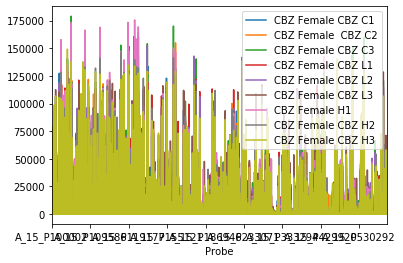

In [7]:
df.plot()



# Data Training and Testing Split

After running some basic algorithm on exploring the characteristics of the dataset and ensuring that the dataset can be loaded into the notebook, the next step is to split the data into test and train set in order to draw predictions and look for signatures. 

Before the plit, the dataframe is transposed to have the probes in columns and the samples in rows. dtype was done to ensure all the values were numbers. After the normal split, 7 samples were selected as train and 2 random ones are test. 

In [8]:
>>> import pandas as pd
>>> from sklearn.model_selection import train_test_split
>>> from sklearn import datasets 
>>> from sklearn import svm
import sklearn
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble

In [9]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.metrics
import sklearn.ensemble
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_transpose = df.transpose()
print(f'Transposed Array:\n{df_transpose}')


Transposed Array:
Probe               A_15_P100002  A_15_P100003  A_15_P100007  A_15_P100008  \
CBZ Female CBZ C1     732.140686      5.642436     24.650720    288.779800   
CBZ Female  CBZ C2    751.492957     12.280938     19.237571    207.017687   
CBZ Female CBZ C3    1061.578781      9.643904     71.626645    394.963392   
CBZ Female CBZ L1     608.569518      5.000000     37.191560    280.217800   
CBZ Female CBZ L2     581.437557     11.570123     46.763869    215.583580   
CBZ Female CBZ L3     804.785507      5.000000      5.847644    235.551200   
CBZ Female H1         677.102713     10.536166     11.190816    214.789861   
CBZ Female CBZ H2     820.093903      5.000000     17.888300    195.551700   
CBZ Female CBZ H3    1187.151127      7.309313      7.309313    376.153766   

Probe               A_15_P100009  A_15_P100010  A_15_P100011  A_15_P100012  \
CBZ Female CBZ C1       8.344403   3583.028869    320.032900   1192.281633   
CBZ Female  CBZ C2     12.280938   4191.81220

In [11]:
# makes sure all the values in the dataset are numbers
df.dtypes 

CBZ Female CBZ C1     float64
CBZ Female  CBZ C2    float64
CBZ Female CBZ C3     float64
CBZ Female CBZ L1     float64
CBZ Female CBZ L2     float64
CBZ Female CBZ L3     float64
CBZ Female H1         float64
CBZ Female CBZ H2     float64
CBZ Female CBZ H3     float64
dtype: object

In [12]:
X = df_transpose
y = [0,0,0,1,1,1,1,1,1]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(\
                                                  X, 
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

In [13]:
print(X_train.shape, len(y_train), X_test.shape, len(y_test))


(7, 43603) 7 (2, 43603) 2


In [14]:
clf = sklearn.ensemble.RandomForestClassifier()
clf.fit(X_train, y_train)
X_train_pred = clf.predict(X_train)

/Users/corieniu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
# this shows how we have done the training set, and it's perfect beacuse everything matches
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [18]:
# A printout of the feature rankings
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("{}. feature: {} ({})".format(f + 1, X_train.columns[f], importances[indices[f]]))

Feature ranking:
1. feature: A_15_P100002 (0.09999999999999998)
2. feature: A_15_P100003 (0.09999999999999998)
3. feature: A_15_P100007 (0.09999999999999998)
4. feature: A_15_P100008 (0.09999999999999998)
5. feature: A_15_P100009 (0.09999999999999998)
6. feature: A_15_P100010 (0.09999999999999998)
7. feature: A_15_P100011 (0.09999999999999998)
8. feature: A_15_P100012 (0.09999999999999998)
9. feature: A_15_P100014 (0.09999999999999998)
10. feature: A_15_P100015 (0.09999999999999998)
11. feature: A_15_P100016 (0.0)
12. feature: A_15_P100017 (0.0)
13. feature: A_15_P100018 (0.0)
14. feature: A_15_P100019 (0.0)
15. feature: A_15_P100022 (0.0)
16. feature: A_15_P100023 (0.0)
17. feature: A_15_P100025 (0.0)
18. feature: A_15_P100028 (0.0)
19. feature: A_15_P100030 (0.0)
20. feature: A_15_P100032 (0.0)
21. feature: A_15_P100033 (0.0)
22. feature: A_15_P100038 (0.0)
23. feature: A_15_P100043 (0.0)
24. feature: A_15_P100048 (0.0)
25. feature: A_15_P100049 (0.0)
26. feature: A_15_P100051 (0.0)


1635. feature: A_15_P103184 (0.0)
1636. feature: A_15_P103185 (0.0)
1637. feature: A_15_P103186 (0.0)
1638. feature: A_15_P103187 (0.0)
1639. feature: A_15_P103188 (0.0)
1640. feature: A_15_P103192 (0.0)
1641. feature: A_15_P103193 (0.0)
1642. feature: A_15_P103197 (0.0)
1643. feature: A_15_P103198 (0.0)
1644. feature: A_15_P103200 (0.0)
1645. feature: A_15_P103201 (0.0)
1646. feature: A_15_P103207 (0.0)
1647. feature: A_15_P103209 (0.0)
1648. feature: A_15_P103210 (0.0)
1649. feature: A_15_P103211 (0.0)
1650. feature: A_15_P103212 (0.0)
1651. feature: A_15_P103213 (0.0)
1652. feature: A_15_P103216 (0.0)
1653. feature: A_15_P103217 (0.0)
1654. feature: A_15_P103218 (0.0)
1655. feature: A_15_P103219 (0.0)
1656. feature: A_15_P103220 (0.0)
1657. feature: A_15_P103223 (0.0)
1658. feature: A_15_P103224 (0.0)
1659. feature: A_15_P103225 (0.0)
1660. feature: A_15_P103228 (0.0)
1661. feature: A_15_P103230 (0.0)
1662. feature: A_15_P103231 (0.0)
1663. feature: A_15_P103232 (0.0)
1664. feature:

2241. feature: A_15_P104297 (0.0)
2242. feature: A_15_P104298 (0.0)
2243. feature: A_15_P104303 (0.0)
2244. feature: A_15_P104304 (0.0)
2245. feature: A_15_P104305 (0.0)
2246. feature: A_15_P104308 (0.0)
2247. feature: A_15_P104316 (0.0)
2248. feature: A_15_P104321 (0.0)
2249. feature: A_15_P104323 (0.0)
2250. feature: A_15_P104324 (0.0)
2251. feature: A_15_P104325 (0.0)
2252. feature: A_15_P104326 (0.0)
2253. feature: A_15_P104329 (0.0)
2254. feature: A_15_P104331 (0.0)
2255. feature: A_15_P104332 (0.0)
2256. feature: A_15_P104333 (0.0)
2257. feature: A_15_P104334 (0.0)
2258. feature: A_15_P104336 (0.0)
2259. feature: A_15_P104337 (0.0)
2260. feature: A_15_P104338 (0.0)
2261. feature: A_15_P104339 (0.0)
2262. feature: A_15_P104340 (0.0)
2263. feature: A_15_P104341 (0.0)
2264. feature: A_15_P104342 (0.0)
2265. feature: A_15_P104345 (0.0)
2266. feature: A_15_P104346 (0.0)
2267. feature: A_15_P104347 (0.0)
2268. feature: A_15_P104348 (0.0)
2269. feature: A_15_P104349 (0.0)
2270. feature:

3241. feature: A_15_P106225 (0.0)
3242. feature: A_15_P106226 (0.0)
3243. feature: A_15_P106228 (0.0)
3244. feature: A_15_P106231 (0.0)
3245. feature: A_15_P106234 (0.0)
3246. feature: A_15_P106236 (0.0)
3247. feature: A_15_P106239 (0.0)
3248. feature: A_15_P106243 (0.0)
3249. feature: A_15_P106244 (0.0)
3250. feature: A_15_P106247 (0.0)
3251. feature: A_15_P106248 (0.0)
3252. feature: A_15_P106250 (0.0)
3253. feature: A_15_P106254 (0.0)
3254. feature: A_15_P106257 (0.0)
3255. feature: A_15_P106258 (0.0)
3256. feature: A_15_P106259 (0.0)
3257. feature: A_15_P106261 (0.0)
3258. feature: A_15_P106262 (0.0)
3259. feature: A_15_P106263 (0.0)
3260. feature: A_15_P106265 (0.0)
3261. feature: A_15_P106272 (0.0)
3262. feature: A_15_P106273 (0.0)
3263. feature: A_15_P106274 (0.0)
3264. feature: A_15_P106279 (0.0)
3265. feature: A_15_P106280 (0.0)
3266. feature: A_15_P106282 (0.0)
3267. feature: A_15_P106284 (0.0)
3268. feature: A_15_P106286 (0.0)
3269. feature: A_15_P106287 (0.0)
3270. feature:

4241. feature: A_15_P108129 (0.0)
4242. feature: A_15_P108133 (0.0)
4243. feature: A_15_P108136 (0.0)
4244. feature: A_15_P108137 (0.0)
4245. feature: A_15_P108140 (0.0)
4246. feature: A_15_P108141 (0.0)
4247. feature: A_15_P108142 (0.0)
4248. feature: A_15_P108143 (0.0)
4249. feature: A_15_P108144 (0.0)
4250. feature: A_15_P108147 (0.0)
4251. feature: A_15_P108150 (0.0)
4252. feature: A_15_P108152 (0.0)
4253. feature: A_15_P108154 (0.0)
4254. feature: A_15_P108158 (0.0)
4255. feature: A_15_P108159 (0.0)
4256. feature: A_15_P108161 (0.0)
4257. feature: A_15_P108164 (0.0)
4258. feature: A_15_P108165 (0.0)
4259. feature: A_15_P108167 (0.0)
4260. feature: A_15_P108168 (0.0)
4261. feature: A_15_P108170 (0.0)
4262. feature: A_15_P108171 (0.0)
4263. feature: A_15_P108172 (0.0)
4264. feature: A_15_P108173 (0.0)
4265. feature: A_15_P108174 (0.0)
4266. feature: A_15_P108176 (0.0)
4267. feature: A_15_P108180 (0.0)
4268. feature: A_15_P108189 (0.0)
4269. feature: A_15_P108190 (0.0)
4270. feature:

5740. feature: A_15_P110956 (0.0)
5741. feature: A_15_P110957 (0.0)
5742. feature: A_15_P110958 (0.0)
5743. feature: A_15_P110959 (0.0)
5744. feature: A_15_P110960 (0.0)
5745. feature: A_15_P110963 (0.0)
5746. feature: A_15_P110965 (0.0)
5747. feature: A_15_P110966 (0.0)
5748. feature: A_15_P110972 (0.0)
5749. feature: A_15_P110974 (0.0)
5750. feature: A_15_P110976 (0.0)
5751. feature: A_15_P110977 (0.0)
5752. feature: A_15_P110978 (0.0)
5753. feature: A_15_P110980 (0.0)
5754. feature: A_15_P110983 (0.0)
5755. feature: A_15_P110986 (0.0)
5756. feature: A_15_P110990 (0.0)
5757. feature: A_15_P110991 (0.0)
5758. feature: A_15_P110999 (0.0)
5759. feature: A_15_P111004 (0.0)
5760. feature: A_15_P111005 (0.0)
5761. feature: A_15_P111007 (0.0)
5762. feature: A_15_P111008 (0.0)
5763. feature: A_15_P111009 (0.0)
5764. feature: A_15_P111010 (0.0)
5765. feature: A_15_P111011 (0.0)
5766. feature: A_15_P111013 (0.0)
5767. feature: A_15_P111015 (0.0)
5768. feature: A_15_P111016 (0.0)
5769. feature:

7239. feature: A_15_P113790 (0.0)
7240. feature: A_15_P113793 (0.0)
7241. feature: A_15_P113796 (0.0)
7242. feature: A_15_P113798 (0.0)
7243. feature: A_15_P113799 (0.0)
7244. feature: A_15_P113801 (0.0)
7245. feature: A_15_P113807 (0.0)
7246. feature: A_15_P113808 (0.0)
7247. feature: A_15_P113811 (0.0)
7248. feature: A_15_P113814 (0.0)
7249. feature: A_15_P113816 (0.0)
7250. feature: A_15_P113817 (0.0)
7251. feature: A_15_P113818 (0.0)
7252. feature: A_15_P113820 (0.0)
7253. feature: A_15_P113821 (0.0)
7254. feature: A_15_P113828 (0.0)
7255. feature: A_15_P113831 (0.0)
7256. feature: A_15_P113833 (0.0)
7257. feature: A_15_P113840 (0.0)
7258. feature: A_15_P113841 (0.0)
7259. feature: A_15_P113842 (0.0)
7260. feature: A_15_P113843 (0.0)
7261. feature: A_15_P113845 (0.0)
7262. feature: A_15_P113847 (0.0)
7263. feature: A_15_P113848 (0.0)
7264. feature: A_15_P113850 (0.0)
7265. feature: A_15_P113851 (0.0)
7266. feature: A_15_P113852 (0.0)
7267. feature: A_15_P113856 (0.0)
7268. feature:

8739. feature: A_15_P116698 (0.0)
8740. feature: A_15_P116699 (0.0)
8741. feature: A_15_P116702 (0.0)
8742. feature: A_15_P116703 (0.0)
8743. feature: A_15_P116705 (0.0)
8744. feature: A_15_P116708 (0.0)
8745. feature: A_15_P116709 (0.0)
8746. feature: A_15_P116710 (0.0)
8747. feature: A_15_P116712 (0.0)
8748. feature: A_15_P116714 (0.0)
8749. feature: A_15_P116715 (0.0)
8750. feature: A_15_P116720 (0.0)
8751. feature: A_15_P116721 (0.0)
8752. feature: A_15_P116727 (0.0)
8753. feature: A_15_P116728 (0.0)
8754. feature: A_15_P116729 (0.0)
8755. feature: A_15_P116730 (0.0)
8756. feature: A_15_P116732 (0.0)
8757. feature: A_15_P116733 (0.0)
8758. feature: A_15_P116735 (0.0)
8759. feature: A_15_P116736 (0.0)
8760. feature: A_15_P116738 (0.0)
8761. feature: A_15_P116739 (0.0)
8762. feature: A_15_P116742 (0.0)
8763. feature: A_15_P116744 (0.0)
8764. feature: A_15_P116745 (0.0)
8765. feature: A_15_P116746 (0.0)
8766. feature: A_15_P116749 (0.0)
8767. feature: A_15_P116750 (0.0)
8768. feature:

9923. feature: A_15_P119028 (0.0)
9924. feature: A_15_P119030 (0.0)
9925. feature: A_15_P119031 (0.0)
9926. feature: A_15_P119035 (0.0)
9927. feature: A_15_P119038 (0.0)
9928. feature: A_15_P119042 (0.0)
9929. feature: A_15_P119043 (0.0)
9930. feature: A_15_P119046 (0.0)
9931. feature: A_15_P119049 (0.0)
9932. feature: A_15_P119050 (0.0)
9933. feature: A_15_P119052 (0.0)
9934. feature: A_15_P119053 (0.0)
9935. feature: A_15_P119055 (0.0)
9936. feature: A_15_P119058 (0.0)
9937. feature: A_15_P119059 (0.0)
9938. feature: A_15_P119061 (0.0)
9939. feature: A_15_P119066 (0.0)
9940. feature: A_15_P119070 (0.0)
9941. feature: A_15_P119073 (0.0)
9942. feature: A_15_P119076 (0.0)
9943. feature: A_15_P119080 (0.0)
9944. feature: A_15_P119081 (0.0)
9945. feature: A_15_P119082 (0.0)
9946. feature: A_15_P119084 (0.0)
9947. feature: A_15_P119085 (0.0)
9948. feature: A_15_P119087 (0.0)
9949. feature: A_15_P119088 (0.0)
9950. feature: A_15_P119091 (0.0)
9951. feature: A_15_P119093 (0.0)
9952. feature:

11238. feature: A_15_P130321 (0.0)
11239. feature: A_15_P130331 (0.0)
11240. feature: A_15_P130336 (0.0)
11241. feature: A_15_P130341 (0.0)
11242. feature: A_15_P130346 (0.0)
11243. feature: A_15_P130351 (0.0)
11244. feature: A_15_P130356 (0.0)
11245. feature: A_15_P130361 (0.0)
11246. feature: A_15_P130366 (0.0)
11247. feature: A_15_P130371 (0.0)
11248. feature: A_15_P130376 (0.0)
11249. feature: A_15_P130381 (0.0)
11250. feature: A_15_P130386 (0.0)
11251. feature: A_15_P130391 (0.0)
11252. feature: A_15_P130396 (0.0)
11253. feature: A_15_P130401 (0.0)
11254. feature: A_15_P130406 (0.0)
11255. feature: A_15_P130421 (0.0)
11256. feature: A_15_P130426 (0.0)
11257. feature: A_15_P130431 (0.0)
11258. feature: A_15_P130436 (0.0)
11259. feature: A_15_P130446 (0.0)
11260. feature: A_15_P130461 (0.0)
11261. feature: A_15_P130472 (0.0)
11262. feature: A_15_P130481 (0.0)
11263. feature: A_15_P130486 (0.0)
11264. feature: A_15_P130491 (0.0)
11265. feature: A_15_P130496 (0.0)
11266. feature: A_15

12737. feature: A_15_P141026 (0.0)
12738. feature: A_15_P141031 (0.0)
12739. feature: A_15_P141041 (0.0)
12740. feature: A_15_P141046 (0.0)
12741. feature: A_15_P141051 (0.0)
12742. feature: A_15_P141056 (0.0)
12743. feature: A_15_P141061 (0.0)
12744. feature: A_15_P141066 (0.0)
12745. feature: A_15_P141071 (0.0)
12746. feature: A_15_P141076 (0.0)
12747. feature: A_15_P141086 (0.0)
12748. feature: A_15_P141096 (0.0)
12749. feature: A_15_P141101 (0.0)
12750. feature: A_15_P141106 (0.0)
12751. feature: A_15_P141111 (0.0)
12752. feature: A_15_P141116 (0.0)
12753. feature: A_15_P141121 (0.0)
12754. feature: A_15_P141136 (0.0)
12755. feature: A_15_P141146 (0.0)
12756. feature: A_15_P141151 (0.0)
12757. feature: A_15_P141156 (0.0)
12758. feature: A_15_P141161 (0.0)
12759. feature: A_15_P141166 (0.0)
12760. feature: A_15_P141171 (0.0)
12761. feature: A_15_P141181 (0.0)
12762. feature: A_15_P141186 (0.0)
12763. feature: A_15_P141191 (0.0)
12764. feature: A_15_P141196 (0.0)
12765. feature: A_15

14237. feature: A_15_P150201 (0.0)
14238. feature: A_15_P150206 (0.0)
14239. feature: A_15_P150211 (0.0)
14240. feature: A_15_P150221 (0.0)
14241. feature: A_15_P150231 (0.0)
14242. feature: A_15_P150236 (0.0)
14243. feature: A_15_P150241 (0.0)
14244. feature: A_15_P150251 (0.0)
14245. feature: A_15_P150266 (0.0)
14246. feature: A_15_P150271 (0.0)
14247. feature: A_15_P150276 (0.0)
14248. feature: A_15_P150281 (0.0)
14249. feature: A_15_P150286 (0.0)
14250. feature: A_15_P150291 (0.0)
14251. feature: A_15_P150301 (0.0)
14252. feature: A_15_P150306 (0.0)
14253. feature: A_15_P150316 (0.0)
14254. feature: A_15_P150321 (0.0)
14255. feature: A_15_P150326 (0.0)
14256. feature: A_15_P150336 (0.0)
14257. feature: A_15_P150341 (0.0)
14258. feature: A_15_P150346 (0.0)
14259. feature: A_15_P150351 (0.0)
14260. feature: A_15_P150356 (0.0)
14261. feature: A_15_P150361 (0.0)
14262. feature: A_15_P150366 (0.0)
14263. feature: A_15_P150376 (0.0)
14264. feature: A_15_P150381 (0.0)
14265. feature: A_15

15237. feature: A_15_P156796 (0.0)
15238. feature: A_15_P156801 (0.0)
15239. feature: A_15_P156806 (0.0)
15240. feature: A_15_P156811 (0.0)
15241. feature: A_15_P156816 (0.0)
15242. feature: A_15_P156821 (0.0)
15243. feature: A_15_P156826 (0.0)
15244. feature: A_15_P156831 (0.0)
15245. feature: A_15_P156836 (0.0)
15246. feature: A_15_P156841 (0.0)
15247. feature: A_15_P156846 (0.0)
15248. feature: A_15_P156851 (0.0)
15249. feature: A_15_P156856 (0.0)
15250. feature: A_15_P156861 (0.0)
15251. feature: A_15_P156866 (0.0)
15252. feature: A_15_P156871 (0.0)
15253. feature: A_15_P156876 (0.0)
15254. feature: A_15_P156891 (0.0)
15255. feature: A_15_P156896 (0.0)
15256. feature: A_15_P156901 (0.0)
15257. feature: A_15_P156906 (0.0)
15258. feature: A_15_P156911 (0.0)
15259. feature: A_15_P156921 (0.0)
15260. feature: A_15_P156926 (0.0)
15261. feature: A_15_P156931 (0.0)
15262. feature: A_15_P156936 (0.0)
15263. feature: A_15_P156941 (0.0)
15264. feature: A_15_P156951 (0.0)
15265. feature: A_15

16291. feature: A_15_P163531 (0.0)
16292. feature: A_15_P163536 (0.0)
16293. feature: A_15_P163541 (0.0)
16294. feature: A_15_P163546 (0.0)
16295. feature: A_15_P163551 (0.0)
16296. feature: A_15_P163556 (0.0)
16297. feature: A_15_P163561 (0.0)
16298. feature: A_15_P163571 (0.0)
16299. feature: A_15_P163581 (0.0)
16300. feature: A_15_P163586 (0.0)
16301. feature: A_15_P163591 (0.0)
16302. feature: A_15_P163601 (0.0)
16303. feature: A_15_P163606 (0.0)
16304. feature: A_15_P163611 (0.0)
16305. feature: A_15_P163621 (0.0)
16306. feature: A_15_P163626 (0.0)
16307. feature: A_15_P163631 (0.0)
16308. feature: A_15_P163636 (0.0)
16309. feature: A_15_P163641 (0.0)
16310. feature: A_15_P163646 (0.0)
16311. feature: A_15_P163651 (0.0)
16312. feature: A_15_P163656 (0.0)
16313. feature: A_15_P163661 (0.0)
16314. feature: A_15_P163666 (0.0)
16315. feature: A_15_P163676 (0.0)
16316. feature: A_15_P163681 (0.0)
16317. feature: A_15_P163691 (0.0)
16318. feature: A_15_P163696 (0.0)
16319. feature: A_15

17735. feature: A_15_P172646 (0.0)
17736. feature: A_15_P172651 (0.0)
17737. feature: A_15_P172656 (0.0)
17738. feature: A_15_P172661 (0.0)
17739. feature: A_15_P172666 (0.0)
17740. feature: A_15_P172671 (0.0)
17741. feature: A_15_P172676 (0.0)
17742. feature: A_15_P172681 (0.0)
17743. feature: A_15_P172686 (0.0)
17744. feature: A_15_P172691 (0.0)
17745. feature: A_15_P172696 (0.0)
17746. feature: A_15_P172701 (0.0)
17747. feature: A_15_P172706 (0.0)
17748. feature: A_15_P172711 (0.0)
17749. feature: A_15_P172716 (0.0)
17750. feature: A_15_P172721 (0.0)
17751. feature: A_15_P172726 (0.0)
17752. feature: A_15_P172736 (0.0)
17753. feature: A_15_P172741 (0.0)
17754. feature: A_15_P172746 (0.0)
17755. feature: A_15_P172751 (0.0)
17756. feature: A_15_P172761 (0.0)
17757. feature: A_15_P172771 (0.0)
17758. feature: A_15_P172776 (0.0)
17759. feature: A_15_P172781 (0.0)
17760. feature: A_15_P172786 (0.0)
17761. feature: A_15_P172791 (0.0)
17762. feature: A_15_P172796 (0.0)
17763. feature: A_15

19235. feature: A_15_P181971 (0.0)
19236. feature: A_15_P181976 (0.0)
19237. feature: A_15_P181981 (0.0)
19238. feature: A_15_P181986 (0.0)
19239. feature: A_15_P181991 (0.0)
19240. feature: A_15_P181996 (0.0)
19241. feature: A_15_P182001 (0.0)
19242. feature: A_15_P182006 (0.0)
19243. feature: A_15_P182011 (0.0)
19244. feature: A_15_P182016 (0.0)
19245. feature: A_15_P182026 (0.0)
19246. feature: A_15_P182031 (0.0)
19247. feature: A_15_P182036 (0.0)
19248. feature: A_15_P182046 (0.0)
19249. feature: A_15_P182051 (0.0)
19250. feature: A_15_P182056 (0.0)
19251. feature: A_15_P182061 (0.0)
19252. feature: A_15_P182066 (0.0)
19253. feature: A_15_P182071 (0.0)
19254. feature: A_15_P182076 (0.0)
19255. feature: A_15_P182081 (0.0)
19256. feature: A_15_P182086 (0.0)
19257. feature: A_15_P182091 (0.0)
19258. feature: A_15_P182096 (0.0)
19259. feature: A_15_P182116 (0.0)
19260. feature: A_15_P182126 (0.0)
19261. feature: A_15_P182131 (0.0)
19262. feature: A_15_P182141 (0.0)
19263. feature: A_15

20734. feature: A_15_P192101 (0.0)
20735. feature: A_15_P192106 (0.0)
20736. feature: A_15_P192111 (0.0)
20737. feature: A_15_P192116 (0.0)
20738. feature: A_15_P192126 (0.0)
20739. feature: A_15_P192131 (0.0)
20740. feature: A_15_P192136 (0.0)
20741. feature: A_15_P192156 (0.0)
20742. feature: A_15_P192161 (0.0)
20743. feature: A_15_P192166 (0.0)
20744. feature: A_15_P192171 (0.0)
20745. feature: A_15_P192176 (0.0)
20746. feature: A_15_P192181 (0.0)
20747. feature: A_15_P192186 (0.0)
20748. feature: A_15_P192191 (0.0)
20749. feature: A_15_P192196 (0.0)
20750. feature: A_15_P192201 (0.0)
20751. feature: A_15_P192206 (0.0)
20752. feature: A_15_P192211 (0.0)
20753. feature: A_15_P192216 (0.0)
20754. feature: A_15_P192221 (0.0)
20755. feature: A_15_P192226 (0.0)
20756. feature: A_15_P192231 (0.0)
20757. feature: A_15_P192251 (0.0)
20758. feature: A_15_P192256 (0.0)
20759. feature: A_15_P192261 (0.0)
20760. feature: A_15_P192266 (0.0)
20761. feature: A_15_P192271 (0.0)
20762. feature: A_15

21948. feature: A_15_P199716 (0.0)
21949. feature: A_15_P199721 (0.0)
21950. feature: A_15_P199736 (0.0)
21951. feature: A_15_P199741 (0.0)
21952. feature: A_15_P199746 (0.0)
21953. feature: A_15_P199751 (0.0)
21954. feature: A_15_P199756 (0.0)
21955. feature: A_15_P199761 (0.0)
21956. feature: A_15_P199771 (0.0)
21957. feature: A_15_P199776 (0.0)
21958. feature: A_15_P199781 (0.0)
21959. feature: A_15_P199786 (0.0)
21960. feature: A_15_P199796 (0.0)
21961. feature: A_15_P199811 (0.0)
21962. feature: A_15_P199821 (0.0)
21963. feature: A_15_P199826 (0.0)
21964. feature: A_15_P199831 (0.0)
21965. feature: A_15_P199843 (0.0)
21966. feature: A_15_P199846 (0.0)
21967. feature: A_15_P199851 (0.0)
21968. feature: A_15_P199856 (0.0)
21969. feature: A_15_P199861 (0.0)
21970. feature: A_15_P199866 (0.0)
21971. feature: A_15_P199871 (0.0)
21972. feature: A_15_P199876 (0.0)
21973. feature: A_15_P199881 (0.0)
21974. feature: A_15_P199886 (0.0)
21975. feature: A_15_P199891 (0.0)
21976. feature: A_15

23233. feature: A_15_P207976 (0.0)
23234. feature: A_15_P207981 (0.0)
23235. feature: A_15_P207986 (0.0)
23236. feature: A_15_P207991 (0.0)
23237. feature: A_15_P207996 (0.0)
23238. feature: A_15_P208001 (0.0)
23239. feature: A_15_P208006 (0.0)
23240. feature: A_15_P208016 (0.0)
23241. feature: A_15_P208021 (0.0)
23242. feature: A_15_P208026 (0.0)
23243. feature: A_15_P208036 (0.0)
23244. feature: A_15_P208041 (0.0)
23245. feature: A_15_P208046 (0.0)
23246. feature: A_15_P208051 (0.0)
23247. feature: A_15_P208059 (0.0)
23248. feature: A_15_P208061 (0.0)
23249. feature: A_15_P208066 (0.0)
23250. feature: A_15_P208076 (0.0)
23251. feature: A_15_P208081 (0.0)
23252. feature: A_15_P208086 (0.0)
23253. feature: A_15_P208096 (0.0)
23254. feature: A_15_P208101 (0.0)
23255. feature: A_15_P208106 (0.0)
23256. feature: A_15_P208111 (0.0)
23257. feature: A_15_P208116 (0.0)
23258. feature: A_15_P208121 (0.0)
23259. feature: A_15_P208126 (0.0)
23260. feature: A_15_P208131 (0.0)
23261. feature: A_15

24733. feature: A_15_P227846 (0.0)
24734. feature: A_15_P227881 (0.0)
24735. feature: A_15_P227896 (0.0)
24736. feature: A_15_P227981 (0.0)
24737. feature: A_15_P228016 (0.0)
24738. feature: A_15_P228101 (0.0)
24739. feature: A_15_P228111 (0.0)
24740. feature: A_15_P228131 (0.0)
24741. feature: A_15_P228141 (0.0)
24742. feature: A_15_P228146 (0.0)
24743. feature: A_15_P228196 (0.0)
24744. feature: A_15_P228236 (0.0)
24745. feature: A_15_P228251 (0.0)
24746. feature: A_15_P228271 (0.0)
24747. feature: A_15_P228291 (0.0)
24748. feature: A_15_P228321 (0.0)
24749. feature: A_15_P228361 (0.0)
24750. feature: A_15_P228386 (0.0)
24751. feature: A_15_P228391 (0.0)
24752. feature: A_15_P228446 (0.0)
24753. feature: A_15_P228461 (0.0)
24754. feature: A_15_P228476 (0.0)
24755. feature: A_15_P228481 (0.0)
24756. feature: A_15_P228486 (0.0)
24757. feature: A_15_P228511 (0.0)
24758. feature: A_15_P228556 (0.0)
24759. feature: A_15_P228561 (0.0)
24760. feature: A_15_P228576 (0.0)
24761. feature: A_15

26176. feature: A_15_P257946 (0.0)
26177. feature: A_15_P257961 (0.0)
26178. feature: A_15_P257971 (0.0)
26179. feature: A_15_P257996 (0.0)
26180. feature: A_15_P258001 (0.0)
26181. feature: A_15_P258006 (0.0)
26182. feature: A_15_P258041 (0.0)
26183. feature: A_15_P258116 (0.0)
26184. feature: A_15_P258196 (0.0)
26185. feature: A_15_P258206 (0.0)
26186. feature: A_15_P258221 (0.0)
26187. feature: A_15_P258231 (0.0)
26188. feature: A_15_P258256 (0.0)
26189. feature: A_15_P258316 (0.0)
26190. feature: A_15_P258326 (0.0)
26191. feature: A_15_P258356 (0.0)
26192. feature: A_15_P258381 (0.0)
26193. feature: A_15_P258401 (0.0)
26194. feature: A_15_P258431 (0.0)
26195. feature: A_15_P258456 (0.0)
26196. feature: A_15_P258486 (0.0)
26197. feature: A_15_P258496 (0.0)
26198. feature: A_15_P258506 (0.0)
26199. feature: A_15_P258521 (0.0)
26200. feature: A_15_P258541 (0.0)
26201. feature: A_15_P258551 (0.0)
26202. feature: A_15_P258601 (0.0)
26203. feature: A_15_P258606 (0.0)
26204. feature: A_15

27668. feature: A_15_P288811 (0.0)
27669. feature: A_15_P288826 (0.0)
27670. feature: A_15_P288841 (0.0)
27671. feature: A_15_P288856 (0.0)
27672. feature: A_15_P288906 (0.0)
27673. feature: A_15_P288931 (0.0)
27674. feature: A_15_P288956 (0.0)
27675. feature: A_15_P289001 (0.0)
27676. feature: A_15_P289036 (0.0)
27677. feature: A_15_P289156 (0.0)
27678. feature: A_15_P289226 (0.0)
27679. feature: A_15_P289251 (0.0)
27680. feature: A_15_P289331 (0.0)
27681. feature: A_15_P289346 (0.0)
27682. feature: A_15_P289376 (0.0)
27683. feature: A_15_P289391 (0.0)
27684. feature: A_15_P289396 (0.0)
27685. feature: A_15_P289406 (0.0)
27686. feature: A_15_P289416 (0.0)
27687. feature: A_15_P289426 (0.0)
27688. feature: A_15_P289441 (0.0)
27689. feature: A_15_P289491 (0.0)
27690. feature: A_15_P289496 (0.0)
27691. feature: A_15_P289516 (0.0)
27692. feature: A_15_P289551 (0.0)
27693. feature: A_15_P289556 (0.0)
27694. feature: A_15_P289581 (0.0)
27695. feature: A_15_P289586 (0.0)
27696. feature: A_15

28289. feature: A_15_P301406 (0.0)
28290. feature: A_15_P301411 (0.0)
28291. feature: A_15_P301486 (0.0)
28292. feature: A_15_P301491 (0.0)
28293. feature: A_15_P301551 (0.0)
28294. feature: A_15_P301556 (0.0)
28295. feature: A_15_P301576 (0.0)
28296. feature: A_15_P301591 (0.0)
28297. feature: A_15_P301606 (0.0)
28298. feature: A_15_P301621 (0.0)
28299. feature: A_15_P301626 (0.0)
28300. feature: A_15_P301646 (0.0)
28301. feature: A_15_P301656 (0.0)
28302. feature: A_15_P301661 (0.0)
28303. feature: A_15_P301666 (0.0)
28304. feature: A_15_P301701 (0.0)
28305. feature: A_15_P301721 (0.0)
28306. feature: A_15_P301726 (0.0)
28307. feature: A_15_P301761 (0.0)
28308. feature: A_15_P301821 (0.0)
28309. feature: A_15_P301826 (0.0)
28310. feature: A_15_P301881 (0.0)
28311. feature: A_15_P301911 (0.0)
28312. feature: A_15_P301916 (0.0)
28313. feature: A_15_P301921 (0.0)
28314. feature: A_15_P301966 (0.0)
28315. feature: A_15_P302011 (0.0)
28316. feature: A_15_P302021 (0.0)
28317. feature: A_15

29731. feature: A_15_P327731 (0.0)
29732. feature: A_15_P327746 (0.0)
29733. feature: A_15_P327751 (0.0)
29734. feature: A_15_P327776 (0.0)
29735. feature: A_15_P327781 (0.0)
29736. feature: A_15_P327786 (0.0)
29737. feature: A_15_P327806 (0.0)
29738. feature: A_15_P327886 (0.0)
29739. feature: A_15_P327946 (0.0)
29740. feature: A_15_P327956 (0.0)
29741. feature: A_15_P327966 (0.0)
29742. feature: A_15_P327981 (0.0)
29743. feature: A_15_P328001 (0.0)
29744. feature: A_15_P328011 (0.0)
29745. feature: A_15_P328016 (0.0)
29746. feature: A_15_P328051 (0.0)
29747. feature: A_15_P328056 (0.0)
29748. feature: A_15_P328071 (0.0)
29749. feature: A_15_P328076 (0.0)
29750. feature: A_15_P328091 (0.0)
29751. feature: A_15_P328101 (0.0)
29752. feature: A_15_P328116 (0.0)
29753. feature: A_15_P328196 (0.0)
29754. feature: A_15_P328206 (0.0)
29755. feature: A_15_P328216 (0.0)
29756. feature: A_15_P328221 (0.0)
29757. feature: A_15_P328236 (0.0)
29758. feature: A_15_P328251 (0.0)
29759. feature: A_15

31230. feature: A_15_P356335 (0.0)
31231. feature: A_15_P356355 (0.0)
31232. feature: A_15_P356365 (0.0)
31233. feature: A_15_P356370 (0.0)
31234. feature: A_15_P356380 (0.0)
31235. feature: A_15_P356385 (0.0)
31236. feature: A_15_P356400 (0.0)
31237. feature: A_15_P356420 (0.0)
31238. feature: A_15_P356430 (0.0)
31239. feature: A_15_P356445 (0.0)
31240. feature: A_15_P356465 (0.0)
31241. feature: A_15_P356480 (0.0)
31242. feature: A_15_P356485 (0.0)
31243. feature: A_15_P356495 (0.0)
31244. feature: A_15_P356500 (0.0)
31245. feature: A_15_P356510 (0.0)
31246. feature: A_15_P356535 (0.0)
31247. feature: A_15_P356565 (0.0)
31248. feature: A_15_P356575 (0.0)
31249. feature: A_15_P356600 (0.0)
31250. feature: A_15_P356655 (0.0)
31251. feature: A_15_P356670 (0.0)
31252. feature: A_15_P356680 (0.0)
31253. feature: A_15_P356700 (0.0)
31254. feature: A_15_P356720 (0.0)
31255. feature: A_15_P356730 (0.0)
31256. feature: A_15_P356740 (0.0)
31257. feature: A_15_P356750 (0.0)
31258. feature: A_15

32715. feature: A_15_P384670 (0.0)
32716. feature: A_15_P384680 (0.0)
32717. feature: A_15_P384690 (0.0)
32718. feature: A_15_P384705 (0.0)
32719. feature: A_15_P384745 (0.0)
32720. feature: A_15_P384760 (0.0)
32721. feature: A_15_P384785 (0.0)
32722. feature: A_15_P384805 (0.0)
32723. feature: A_15_P384810 (0.0)
32724. feature: A_15_P384820 (0.0)
32725. feature: A_15_P384855 (0.0)
32726. feature: A_15_P384875 (0.0)
32727. feature: A_15_P384905 (0.0)
32728. feature: A_15_P384915 (0.0)
32729. feature: A_15_P384940 (0.0)
32730. feature: A_15_P384955 (0.0)
32731. feature: A_15_P384960 (0.0)
32732. feature: A_15_P384985 (0.0)
32733. feature: A_15_P384995 (0.0)
32734. feature: A_15_P385010 (0.0)
32735. feature: A_15_P385015 (0.0)
32736. feature: A_15_P385045 (0.0)
32737. feature: A_15_P385055 (0.0)
32738. feature: A_15_P385075 (0.0)
32739. feature: A_15_P385095 (0.0)
32740. feature: A_15_P385100 (0.0)
32741. feature: A_15_P385150 (0.0)
32742. feature: A_15_P385165 (0.0)
32743. feature: A_15

33403. feature: A_15_P396535 (0.0)
33404. feature: A_15_P396560 (0.0)
33405. feature: A_15_P396565 (0.0)
33406. feature: A_15_P396580 (0.0)
33407. feature: A_15_P396586 (0.0)
33408. feature: A_15_P396590 (0.0)
33409. feature: A_15_P396615 (0.0)
33410. feature: A_15_P396625 (0.0)
33411. feature: A_15_P396635 (0.0)
33412. feature: A_15_P396650 (0.0)
33413. feature: A_15_P396655 (0.0)
33414. feature: A_15_P396660 (0.0)
33415. feature: A_15_P396705 (0.0)
33416. feature: A_15_P396720 (0.0)
33417. feature: A_15_P396770 (0.0)
33418. feature: A_15_P396775 (0.0)
33419. feature: A_15_P396830 (0.0)
33420. feature: A_15_P396875 (0.0)
33421. feature: A_15_P396885 (0.0)
33422. feature: A_15_P396900 (0.0)
33423. feature: A_15_P396925 (0.0)
33424. feature: A_15_P396935 (0.0)
33425. feature: A_15_P396960 (0.0)
33426. feature: A_15_P396980 (0.0)
33427. feature: A_15_P396985 (0.0)
33428. feature: A_15_P397035 (0.0)
33429. feature: A_15_P397040 (0.0)
33430. feature: A_15_P397050 (0.0)
33431. feature: A_15

35229. feature: A_15_P434715 (0.0)
35230. feature: A_15_P434725 (0.0)
35231. feature: A_15_P434730 (0.0)
35232. feature: A_15_P434740 (0.0)
35233. feature: A_15_P434825 (0.0)
35234. feature: A_15_P434835 (0.0)
35235. feature: A_15_P434895 (0.0)
35236. feature: A_15_P434905 (0.0)
35237. feature: A_15_P434935 (0.0)
35238. feature: A_15_P434965 (0.0)
35239. feature: A_15_P434975 (0.0)
35240. feature: A_15_P435005 (0.0)
35241. feature: A_15_P435025 (0.0)
35242. feature: A_15_P435030 (0.0)
35243. feature: A_15_P435080 (0.0)
35244. feature: A_15_P435085 (0.0)
35245. feature: A_15_P435100 (0.0)
35246. feature: A_15_P435105 (0.0)
35247. feature: A_15_P435120 (0.0)
35248. feature: A_15_P435125 (0.0)
35249. feature: A_15_P435130 (0.0)
35250. feature: A_15_P435145 (0.0)
35251. feature: A_15_P435165 (0.0)
35252. feature: A_15_P435180 (0.0)
35253. feature: A_15_P435185 (0.0)
35254. feature: A_15_P435190 (0.0)
35255. feature: A_15_P435205 (0.0)
35256. feature: A_15_P435310 (0.0)
35257. feature: A_15

36728. feature: A_15_P465910 (0.0)
36729. feature: A_15_P465915 (0.0)
36730. feature: A_15_P465930 (0.0)
36731. feature: A_15_P465935 (0.0)
36732. feature: A_15_P465960 (0.0)
36733. feature: A_15_P465975 (0.0)
36734. feature: A_15_P465990 (0.0)
36735. feature: A_15_P466015 (0.0)
36736. feature: A_15_P466065 (0.0)
36737. feature: A_15_P466070 (0.0)
36738. feature: A_15_P466085 (0.0)
36739. feature: A_15_P466145 (0.0)
36740. feature: A_15_P466160 (0.0)
36741. feature: A_15_P466165 (0.0)
36742. feature: A_15_P466180 (0.0)
36743. feature: A_15_P466205 (0.0)
36744. feature: A_15_P466210 (0.0)
36745. feature: A_15_P466285 (0.0)
36746. feature: A_15_P466295 (0.0)
36747. feature: A_15_P466310 (0.0)
36748. feature: A_15_P466325 (0.0)
36749. feature: A_15_P466335 (0.0)
36750. feature: A_15_P466340 (0.0)
36751. feature: A_15_P466380 (0.0)
36752. feature: A_15_P466390 (0.0)
36753. feature: A_15_P466435 (0.0)
36754. feature: A_15_P466470 (0.0)
36755. feature: A_15_P466505 (0.0)
36756. feature: A_15

38228. feature: A_15_P495392 (0.0)
38229. feature: A_15_P495397 (0.0)
38230. feature: A_15_P495402 (0.0)
38231. feature: A_15_P495437 (0.0)
38232. feature: A_15_P495472 (0.0)
38233. feature: A_15_P495497 (0.0)
38234. feature: A_15_P495517 (0.0)
38235. feature: A_15_P495527 (0.0)
38236. feature: A_15_P495552 (0.0)
38237. feature: A_15_P495557 (0.0)
38238. feature: A_15_P495572 (0.0)
38239. feature: A_15_P495577 (0.0)
38240. feature: A_15_P495607 (0.0)
38241. feature: A_15_P495617 (0.0)
38242. feature: A_15_P495632 (0.0)
38243. feature: A_15_P495647 (0.0)
38244. feature: A_15_P495652 (0.0)
38245. feature: A_15_P495657 (0.0)
38246. feature: A_15_P495662 (0.0)
38247. feature: A_15_P495672 (0.0)
38248. feature: A_15_P495697 (0.0)
38249. feature: A_15_P495702 (0.0)
38250. feature: A_15_P495722 (0.0)
38251. feature: A_15_P495732 (0.0)
38252. feature: A_15_P495742 (0.0)
38253. feature: A_15_P495752 (0.0)
38254. feature: A_15_P495772 (0.0)
38255. feature: A_15_P495807 (0.0)
38256. feature: A_15

39227. feature: A_15_P516152 (0.0)
39228. feature: A_15_P516162 (0.0)
39229. feature: A_15_P516182 (0.0)
39230. feature: A_15_P516262 (0.0)
39231. feature: A_15_P516277 (0.0)
39232. feature: A_15_P516292 (0.0)
39233. feature: A_15_P516297 (0.0)
39234. feature: A_15_P516302 (0.0)
39235. feature: A_15_P516352 (0.0)
39236. feature: A_15_P516372 (0.0)
39237. feature: A_15_P516377 (0.0)
39238. feature: A_15_P516412 (0.0)
39239. feature: A_15_P516427 (0.0)
39240. feature: A_15_P516432 (0.0)
39241. feature: A_15_P516447 (0.0)
39242. feature: A_15_P516522 (0.0)
39243. feature: A_15_P516532 (0.0)
39244. feature: A_15_P516537 (0.0)
39245. feature: A_15_P516547 (0.0)
39246. feature: A_15_P516567 (0.0)
39247. feature: A_15_P516592 (0.0)
39248. feature: A_15_P516602 (0.0)
39249. feature: A_15_P516617 (0.0)
39250. feature: A_15_P516632 (0.0)
39251. feature: A_15_P516652 (0.0)
39252. feature: A_15_P516667 (0.0)
39253. feature: A_15_P516677 (0.0)
39254. feature: A_15_P516697 (0.0)
39255. feature: A_15

40727. feature: A_15_P544632 (0.0)
40728. feature: A_15_P544642 (0.0)
40729. feature: A_15_P544667 (0.0)
40730. feature: A_15_P544687 (0.0)
40731. feature: A_15_P544722 (0.0)
40732. feature: A_15_P544727 (0.0)
40733. feature: A_15_P544742 (0.0)
40734. feature: A_15_P544752 (0.0)
40735. feature: A_15_P544782 (0.0)
40736. feature: A_15_P544822 (0.0)
40737. feature: A_15_P544897 (0.0)
40738. feature: A_15_P544912 (0.0)
40739. feature: A_15_P544952 (0.0)
40740. feature: A_15_P544957 (0.0)
40741. feature: A_15_P544992 (0.0)
40742. feature: A_15_P545012 (0.0)
40743. feature: A_15_P545047 (0.0)
40744. feature: A_15_P545072 (0.0)
40745. feature: A_15_P545112 (0.0)
40746. feature: A_15_P545122 (0.0)
40747. feature: A_15_P545142 (0.0)
40748. feature: A_15_P545197 (0.0)
40749. feature: A_15_P545232 (0.0)
40750. feature: A_15_P545267 (0.0)
40751. feature: A_15_P545297 (0.0)
40752. feature: A_15_P545327 (0.0)
40753. feature: A_15_P545362 (0.0)
40754. feature: A_15_P545377 (0.0)
40755. feature: A_15

42226. feature: A_15_P578397 (0.0)
42227. feature: A_15_P578402 (0.0)
42228. feature: A_15_P578417 (0.0)
42229. feature: A_15_P578427 (0.0)
42230. feature: A_15_P578432 (0.0)
42231. feature: A_15_P578487 (0.0)
42232. feature: A_15_P578492 (0.0)
42233. feature: A_15_P578529 (0.0)
42234. feature: A_15_P578537 (0.0)
42235. feature: A_15_P578612 (0.0)
42236. feature: A_15_P578647 (0.0)
42237. feature: A_15_P578682 (0.0)
42238. feature: A_15_P578702 (0.0)
42239. feature: A_15_P578707 (0.0)
42240. feature: A_15_P578717 (0.0)
42241. feature: A_15_P578722 (0.0)
42242. feature: A_15_P578752 (0.0)
42243. feature: A_15_P578852 (0.0)
42244. feature: A_15_P578912 (0.0)
42245. feature: A_15_P578932 (0.0)
42246. feature: A_15_P578947 (0.0)
42247. feature: A_15_P578987 (0.0)
42248. feature: A_15_P578992 (0.0)
42249. feature: A_15_P579012 (0.0)
42250. feature: A_15_P579017 (0.0)
42251. feature: A_15_P579077 (0.0)
42252. feature: A_15_P579117 (0.0)
42253. feature: A_15_P579132 (0.0)
42254. feature: A_15

# Cross Validation 
This is where cross-validation is done. Below is the tutorial following https://scikit-learn.org/stable/modules/cross_validation.html

one of the problem is with the populated class in y, which is only 3 members and might need more. 

In [26]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
scores

/Users/corieniu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([0. , 0.5, 0.5, 0. , 1. ])

In [27]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.40 (+/- 0.75)


In [35]:
>>> from sklearn import metrics
>>> scores = cross_val_score(
...     clf, X, y, cv=5, scoring='f1')
>>> scores

## F1 is used, not sure if this is the correct parameter to choose 

/Users/corieniu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/corieniu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/corieniu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.        , 0.66666667, 0.        , 0.        , 1.        ])

Below explores kfold in machine learning 

KFold divides all the samples in  groups of samples, called folds (if k = n , this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using k-1 folds, and the fold left out is used for test.

# Training Models 

Below are the different models to train the dataset and different ways to generate combinations of data. our dataframe has 9 samples in total, so there are many different ways to split the dataset.  

In [50]:
>>> import numpy as np
>>> from sklearn.model_selection import KFold

>>> X = ["CBZ Female CBZ C1", "CBZ Female CBZ C2","CBZ Female CBZ C3", "CBZ Female CBZ L1", "CBZ Female CBZ L2", "CBZ Female CBZ L3", "CBZ Female CBZ H1", "CBZ Female CBZ H2", "CBZ Female CBZ H3"]
>>> kf = KFold(n_splits=2)
>>> for train, test in kf.split(X):
...     print("%s %s" % (train, test))

# k = the number of groups that a given data sample is to be split into
# in this cell, k = 2, so it's a 2 fold cross-validation 

[5 6 7 8] [0 1 2 3 4]
[0 1 2 3 4] [5 6 7 8]


In [51]:
>>> from sklearn.model_selection import LeaveOneOut

>>> X = [0, 1, 2, 3, 4, 5, 6, 7, 8]
>>> loo = LeaveOneOut()
>>> for train, test in loo.split(X):
...     print("%s %s" % (train, test))

# LeaveOneOut (or LOO) is a simple cross-validation. 
# Each learning set is created by taking all the samples except one, the test set being the sample left out. 

[1 2 3 4 5 6 7 8] [0]
[0 2 3 4 5 6 7 8] [1]
[0 1 3 4 5 6 7 8] [2]
[0 1 2 4 5 6 7 8] [3]
[0 1 2 3 5 6 7 8] [4]
[0 1 2 3 4 6 7 8] [5]
[0 1 2 3 4 5 7 8] [6]
[0 1 2 3 4 5 6 8] [7]
[0 1 2 3 4 5 6 7] [8]


In [52]:
>>> from sklearn.model_selection import LeavePOut

>>> X = np.ones(9)
>>> lpo = LeavePOut(p=2)
>>> for train, test in lpo.split(X):
...     print("%s %s" % (train, test))

# this is an examples of leavePout (LPO). 
# For our dataset we want 2 samples of test samples, so we want to leave 2 samples out

[2 3 4 5 6 7 8] [0 1]
[1 3 4 5 6 7 8] [0 2]
[1 2 4 5 6 7 8] [0 3]
[1 2 3 5 6 7 8] [0 4]
[1 2 3 4 6 7 8] [0 5]
[1 2 3 4 5 7 8] [0 6]
[1 2 3 4 5 6 8] [0 7]
[1 2 3 4 5 6 7] [0 8]
[0 3 4 5 6 7 8] [1 2]
[0 2 4 5 6 7 8] [1 3]
[0 2 3 5 6 7 8] [1 4]
[0 2 3 4 6 7 8] [1 5]
[0 2 3 4 5 7 8] [1 6]
[0 2 3 4 5 6 8] [1 7]
[0 2 3 4 5 6 7] [1 8]
[0 1 4 5 6 7 8] [2 3]
[0 1 3 5 6 7 8] [2 4]
[0 1 3 4 6 7 8] [2 5]
[0 1 3 4 5 7 8] [2 6]
[0 1 3 4 5 6 8] [2 7]
[0 1 3 4 5 6 7] [2 8]
[0 1 2 5 6 7 8] [3 4]
[0 1 2 4 6 7 8] [3 5]
[0 1 2 4 5 7 8] [3 6]
[0 1 2 4 5 6 8] [3 7]
[0 1 2 4 5 6 7] [3 8]
[0 1 2 3 6 7 8] [4 5]
[0 1 2 3 5 7 8] [4 6]
[0 1 2 3 5 6 8] [4 7]
[0 1 2 3 5 6 7] [4 8]
[0 1 2 3 4 7 8] [5 6]
[0 1 2 3 4 6 8] [5 7]
[0 1 2 3 4 6 7] [5 8]
[0 1 2 3 4 5 8] [6 7]
[0 1 2 3 4 5 7] [6 8]
[0 1 2 3 4 5 6] [7 8]


In [47]:
>>> from sklearn.model_selection import ShuffleSplit
>>> X = np.arange(10)
>>> ss = ShuffleSplit(n_splits=9, test_size=0.25, random_state=0)
>>> for train_index, test_index in ss.split(X):
...     print("%s %s" % (train_index, test_index))

# Shufflesplit will generate a user defined number of independent train / test dataset splits. 
# Samples are first shuffled and then split into a pair of train and test sets.
# our dataset has 9 different samples, so we can split it into test and train 9 times 

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]
[5 2 6 3 7 4 0] [1 8 9]
[7 8 6 5 4 9 0] [3 2 1]
[3 5 6 7 1 8 4] [0 9 2]
[1 4 5 3 6 0 2] [7 8 9]


# Test Performance 


In [82]:
>>> np.random.seed(0)
>>> indices = np.random.permutation(len(y))
>>> X_train = X[indices[:-10]]
>>> y_train = y[indices[:-10]]
>>> X_test = X[indices[-10:]]
>>> y_test = y[indices[-10:]]

TypeError: only integer scalar arrays can be converted to a scalar index

In [83]:
>>> from sklearn.neighbors import KNeighborsClassifier
>>> knn = KNeighborsClassifier()
>>> knn.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [74]:
>>> from sklearn import linear_model
>>> regr = linear_model.LinearRegression()
>>> regr.fit(X_train, y_train)
LinearRegression()
>>> print(regr.coef_)  

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [73]:
# a different test feature than the previous one 
def fda_metric(pred_y, true_y):
    pred_y = pd.DataFrame(pred_y)
    pred_y.index = true_y.index
    pred_y.columns = true_y.columns
    pred_y = pred_y.astype('int64')
    
    fda_perf = pd.DataFrame(index=true_ast.index, columns = ['Categorical Agreement',
                                                           'Major Disagreement',
                                                           'Very Major Disagreement'])
    fda_perf = fda_perf.fillna(0)
    for ix, ast in true_ast.iterrows():
        for drug, sir in ast.iteritems():
            if sir == pred_ast.loc[ix, drug]:
                fda_perf.loc[ix, 'Categorical Agreement'] += 1 
            elif sir == 0 and pred_ast.loc[ix, drug] == 1:
                fda_perf.loc[ix, 'Major Disagreement'] += 1
            elif sir == 1 and pred_ast.loc[ix, drug] == 0:
                fda_perf.loc[ix, 'Very Major Disagreement'] += 1
            else:
                assert False
    return fda_perf

# Normalizing Dataset 

In [78]:
from sklearn import preprocessing
>>> X = [[ 1., -1.,  2.],
...      [ 2.,  0.,  0.],
...      [ 0.,  1., -1.]]
>>> X_normalized = preprocessing.normalize(X, norm='l2')

>>> X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [80]:
>>> normalizer = preprocessing.Normalizer().fit(X)  
>>> normalizer

Normalizer(copy=True, norm='l2')

In [81]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [84]:
>>> enc = preprocessing.OrdinalEncoder()
>>> X = df_transpose
>>> enc.fit(X)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [95]:
df.div(df.sum(axis=1), axis=0)

,CBZ Female CBZ C1,CBZ Female CBZ C2,CBZ Female CBZ C3,CBZ Female CBZ L1,CBZ Female CBZ L2,CBZ Female CBZ L3,CBZ Female H1,CBZ Female CBZ H2,CBZ Female CBZ H3
Probe,,,,,,,,,
A_15_P100002,0.101343,0.104022,0.146944,0.084239,0.080483,0.111399,0.093725,0.113518,0.164326
A_15_P100003,0.078386,0.170609,0.133975,0.069461,0.160734,0.069461,0.146370,0.069461,0.101542
A_15_P100007,0.101986,0.079591,0.296337,0.153871,0.193474,0.024193,0.046299,0.074008,0.030240
A_15_P100008,0.119895,0.085949,0.163980,0.116340,0.089505,0.097796,0.089176,0.081189,0.156171
A_15_P100009,0.075389,0.110955,0.097050,0.045174,0.117894,0.151269,0.095191,0.052277,0.254800
...,...,...,...,...,...,...,...,...,...
WilsonLab_58,0.122675,0.162516,0.085348,0.098888,0.180681,0.095509,0.136803,0.072793,0.044786
WilsonLab_61,0.054693,0.137673,0.135558,0.096841,0.097532,0.152241,0.148197,0.056334,0.120931
WilsonLab_64,0.058830,0.058959,0.050809,0.061916,0.070153,0.347932,0.092435,0.051159,0.207806
